<h3> SciPython/Practical_classes_6

<h3> Decision trees

Tree structure components:
- the top vertex (node)
- parent nodes at a higher level with branches connecting child nodes at a lower level
- leaves constituting the final part of the tree, to which appropriate classes are assigned.

We build in such a way that minimize:

- Gini coefficient $I = 1 - \sum_i r_{i}^{2}$

or

- entropy $I = -\sum_i r_i \log_2 r_i$

where $r_i$ - is the proportion of occurrences of $i-$of this class in the current area.

<h4> Exercise1: What are the minimum and maximum values of the Gini index? Justify it. How to interpret these situations?

the gini index ranges from 0 to 1. but for binary classification, when all classes have the same number of samples, p = 0.5, so the max gini index is 0.5. on the other side, when one class has all of the samples, the sum of r² is equal 1 and the gini index is 0 (this happens when we reached the leaf node)


In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [3]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [3]:
from sklearn.tree import DecisionTreeClassifier

- Entropy criterion

In [4]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train);

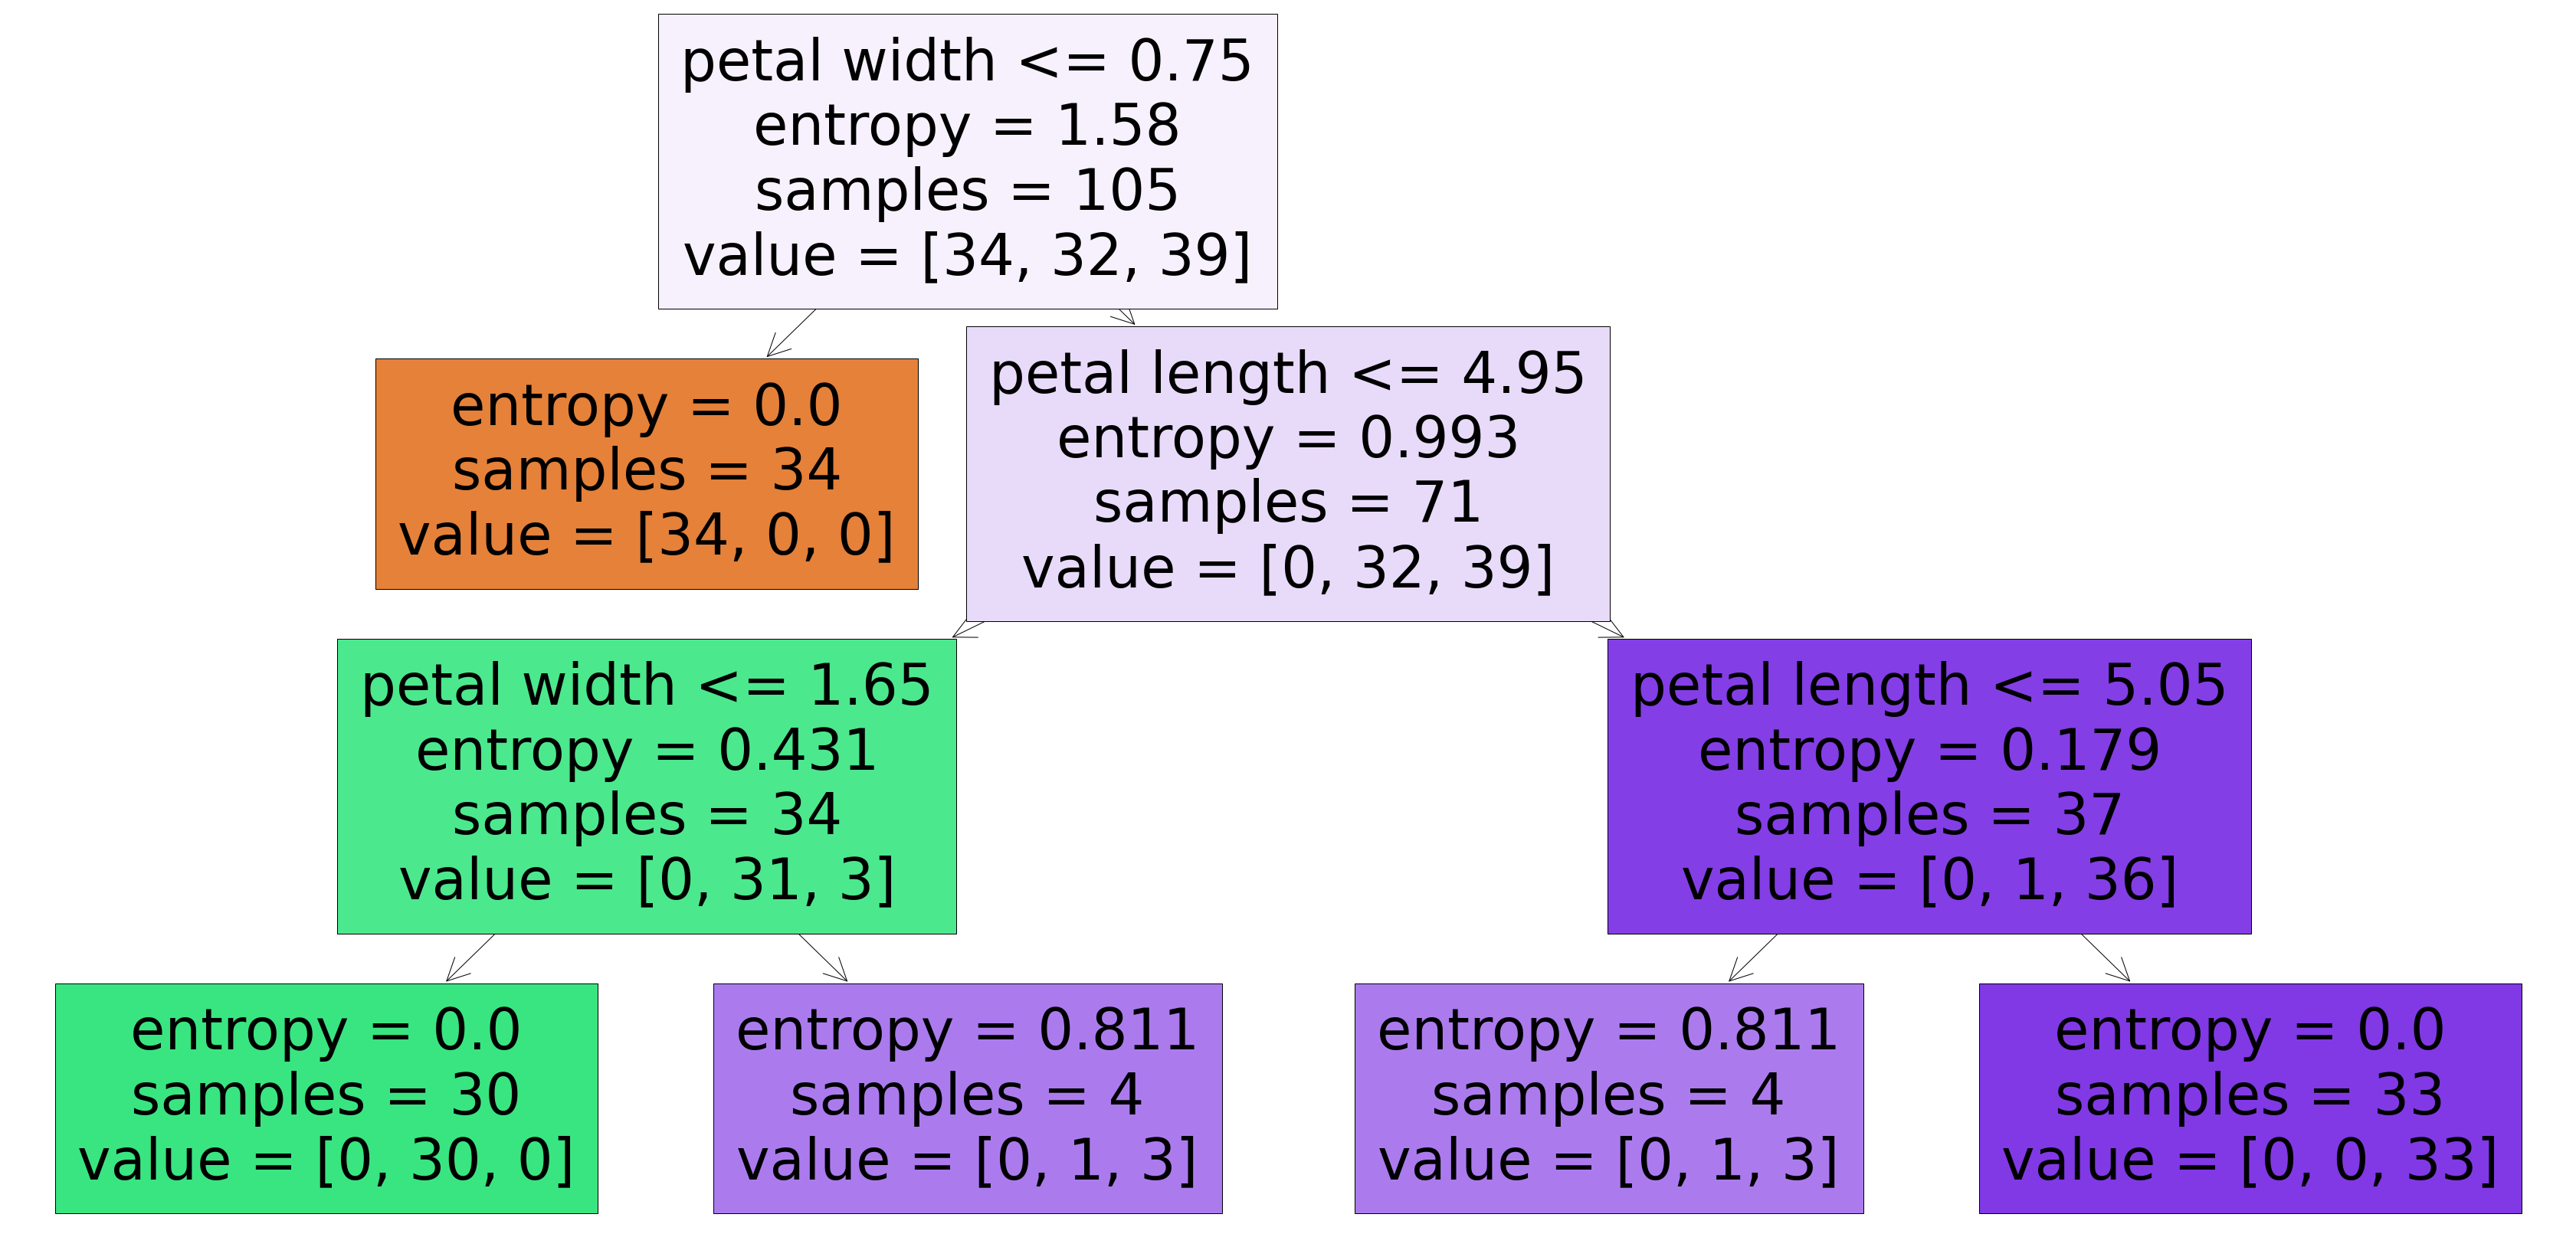

In [5]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(tree, filled=True, feature_names=['petal length', 'petal width']);

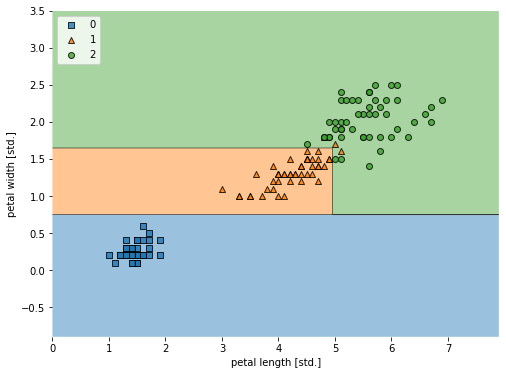

In [6]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X, y=y, clf=tree)
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

In [7]:
print(tree.predict([[1.4, 0.2]]))
print()
print(tree.predict([[5.1, 1.8]]))

[0]

[2]


<h4> Exercise2: Justify the entropy value at the top vertex by direct calculation.

- entropy $I = -\sum_i r_i \log_2 r_i$


In [46]:
# exercise 2

from math import log

sum = 0
unique = np.unique(y)
y_counts = [0]*len(unique)
y_np = np.array(y)
    
for category in unique:
    y_counts[category] = len(y_np[y_np == category])/len(y)
    sum += y_counts[category] * log(y_counts[category], 2)
  
entropy = -sum

entropy

1.584962500721156

- Gini index criterion

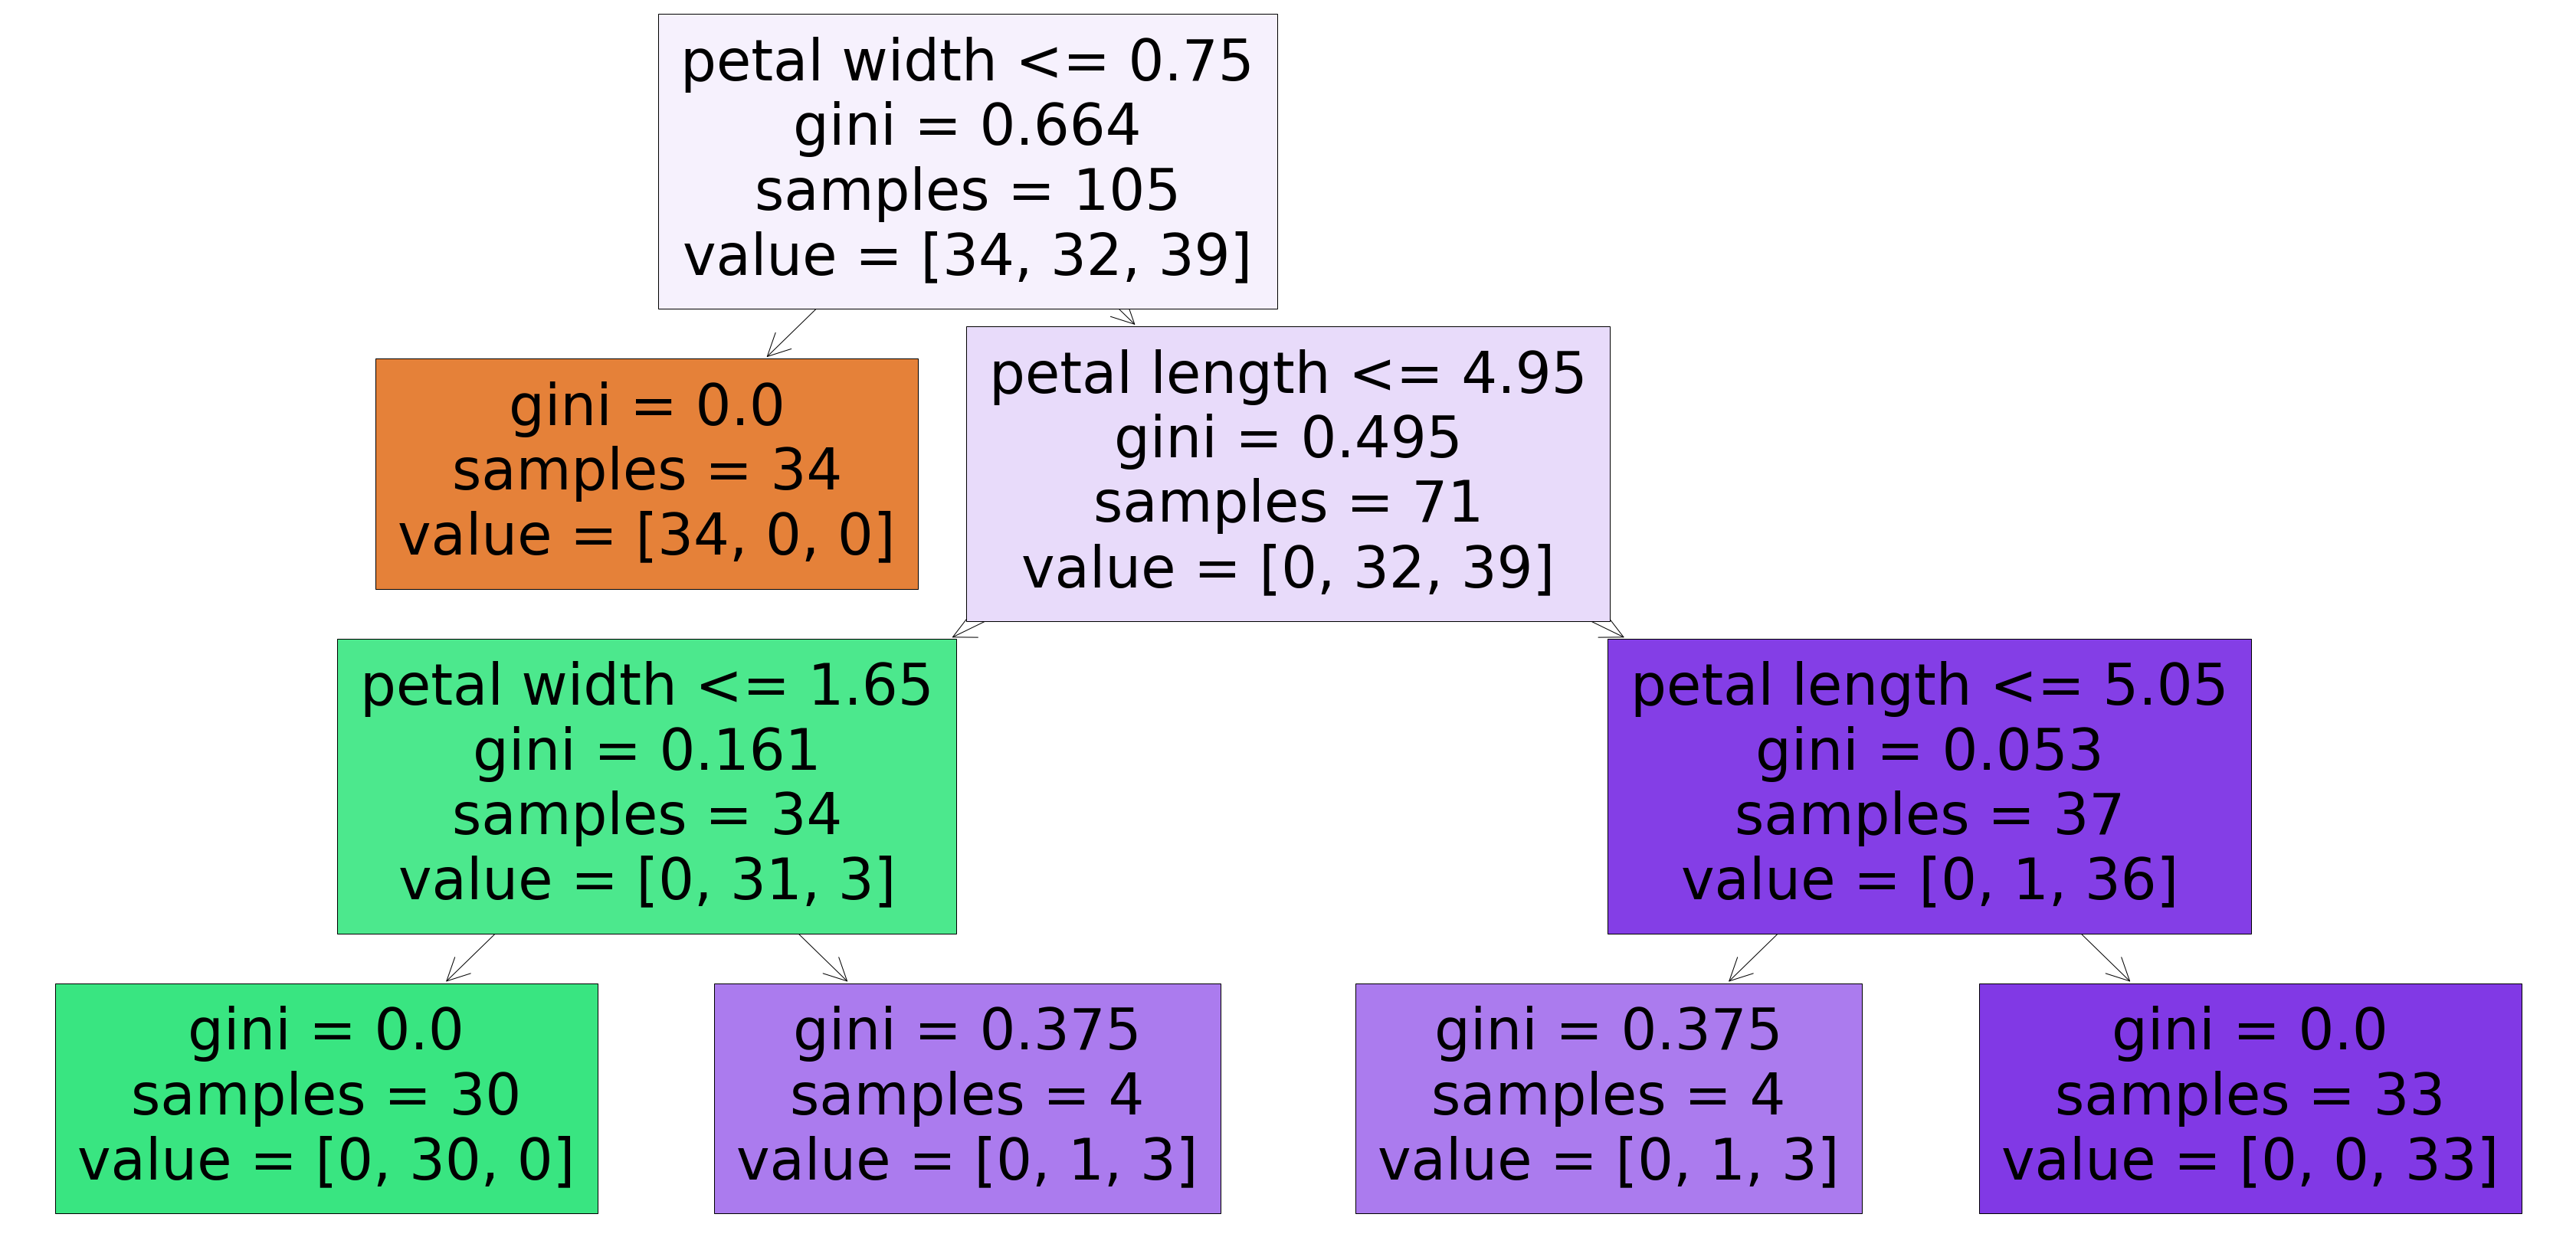

In [8]:
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree_gini.fit(X_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(tree_gini, filled=True, feature_names=['petal length', 'petal width']);

<h4> Exercise3: Justify the Gini index value at the top vertex by direct calculation.

- Gini coefficient $I = 1 - \sum_i r_{i}^{2}$


In [53]:
# exercise 3

sum = 0
    
for category in unique:
    sum += y_counts[category]**2
  
gini = 1 - sum

gini

0.6666666666666667

<h3> Random Forest

A random forest is a variant of a decision tree assembly that implements many randomly generated decision trees at once, which work together to create a final solution with increased accuracy.

- a set of many relatively simple decision trees is used to predict the value of the dependent variable
- each tree predicts the value of the dependent variable based on a random set of independent variables
- prediction of the final value of the model is determined by voting (classification) or averaging (regression task)

The user can specify:
- complexity of component trees
- maximum number of trees
- termination criterion
- others...

Advantages:
- we reduce the risk of overfitting the model
- stability of the model (less likely results are discarded)

It works well on very large data sets, with a huge number of dependent variables, without the need to remove them.


In [9]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators - number of treees; inne np max_depth - maximum depth, to read more: help(RandomForestClassifier)
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=1)
forest.fit(X_train, y_train);

<h4> Exercise4: Random forests models usually use a method of modifying training data - bootstrap aggregation. It consists of multiple draws with replacement. If we repeat such a draw $n$ times, we will get $n$ training dataset element in which some of the cases will be repeated. Show that for large $n$ the sample will average $63 \%$ of cases from the original set.

Prove that in the Bagging method only about 63% of the total original examples (total training set) appear in any of sampled bootstrap datasets. Provide proper justification.

In [6]:
# exercise 4

import numpy as np

# size of the hypothetical dataset
size = 100
# number of bagging datasets
n = 100

# probability of each sample not being
# selected in any of the n datasets
prob = np.power((1-1/size), n)

# probability of a element being selected in any n bagging dataset
prob_selected = 1-prob
prob_selected

0.6339676587267709

<h3> Random Forest for determination of Feature Importance

In [10]:
import pandas as pd

df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=2)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]): #go through all the features
    print(f"{f+1} {feat_labels[f]} {round(importances[indices[f]],4)}")

1 Alcohol 0.1725
2 Malic acid 0.1571
3 Ash 0.1526
4 Alcalinity of ash 0.1103
5 Magnesium 0.109
6 Total phenols 0.0806
7 Flavanolds 0.0536
8 Nonflavanoid phenols 0.0414
9 Proanthocyanins 0.0348
10 Color intensity 0.0298
11 Hue 0.0254
12 OD280/OD315 of diluted wines 0.0185
13 Proline 0.0144


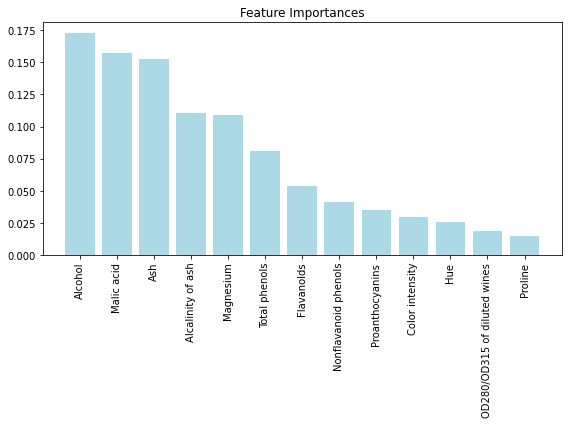

In [12]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

<h3> Random Forest for Regression

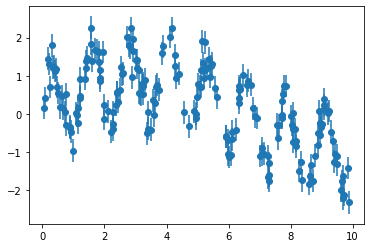

In [13]:
rng = np.random.RandomState(42)
x = 10* rng.rand(200)

def model(x, sigma = 0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)

plt.errorbar(x, y, 0.3, fmt = "o")
plt.show()

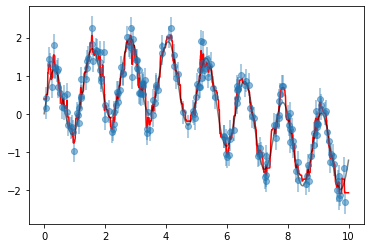

In [14]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, np.newaxis])
ytrue = model(xfit, sigma = 0)

plt.errorbar(x, y, 0.3, fmt = "o", alpha =0.5)
plt.plot(xfit, yfit, "-r")
plt.plot(xfit, ytrue, "-k", alpha = 0.5)
plt.show()

<h3> Random Forest for digits classification

In [15]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

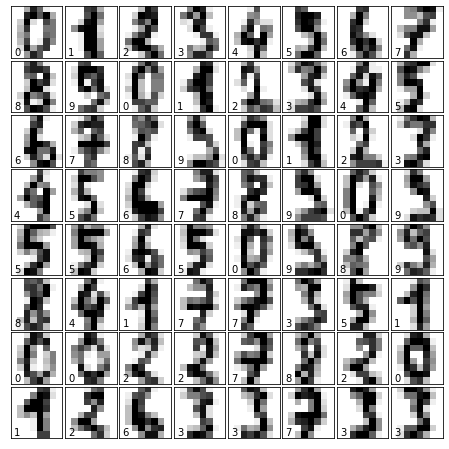

In [16]:
fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left = 0, right =1, bottom=0, top=1, hspace=0.05,wspace=0.05)

for i in range(64): #every image is 8x8 size
    ax = fig.add_subplot(8, 8, i+1, xticks = [], yticks =[])
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = "nearest")
    ax.text(0, 7, str(digits.target[i])) #add label

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state = 0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [18]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



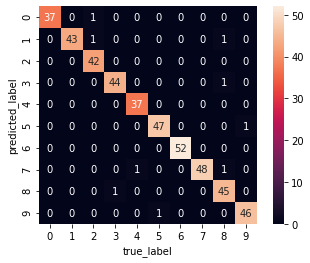

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = True)
plt.xlabel("true_label")
plt.ylabel("predicted_label")
plt.show()

<h4> Exercise5: Consider headings data, which is fake news (1298) and real headlines (1968). One line is one record. Apply decision trees (or Random Forests) and build a classification model. Divide the data into 3 groups: 70% training set, 15% validation set, 15% test set. Test different sets of hyperparameters on a validation set. Comment your results.


In [7]:
f1 = open("fake.txt", "r")
f2 = open("real.txt", "r")

x = []
y = []

for line in f1:
    x.append(line)
    y.append(0)
for line in f2:
    x.append(line)
    y.append(1)
    
f1.close()
f2.close()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(x)
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense().tolist()

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dense, y, test_size=0.3, random_state=42)

X_test, X_valid, y_test, y_valid = train_test_split(X_train, y_train, test_size=0.5, random_state=42)


In [18]:
# exercicio 5

from sklearn.ensemble import RandomForestClassifier

n_estimators = [100, 200, 500, 1000]
max_depth = [7, 9, 11]
min_samples_split = [6, 8, 10, 12]

highest_score = 0

for n_est in n_estimators:
    for max_d in max_depth:        
        for min_sample in min_samples_split:

            model = RandomForestClassifier(n_estimators=n_est, criterion='gini',
                                                        max_depth=max_d, min_samples_split=min_sample)
            model.fit(X_train, y_train)

            score = round(model.score(X_valid, y_valid), 2)

            print(f'Score: {n_est} estimators, {max_d} max depth, {min_sample} min_samples_split: {score}')
            
            if score > highest_score:
                highest_score = score
                highest_nest = n_est
                highest_maxd = max_d
                highest_mins = min_sample


Score: 100 estimators, 7 max depth, 6 min_samples_split: 0.7
Score: 100 estimators, 7 max depth, 8 min_samples_split: 0.67
Score: 100 estimators, 7 max depth, 10 min_samples_split: 0.68
Score: 100 estimators, 7 max depth, 12 min_samples_split: 0.7
Score: 100 estimators, 9 max depth, 6 min_samples_split: 0.73
Score: 100 estimators, 9 max depth, 8 min_samples_split: 0.7
Score: 100 estimators, 9 max depth, 10 min_samples_split: 0.73
Score: 100 estimators, 9 max depth, 12 min_samples_split: 0.7
Score: 100 estimators, 11 max depth, 6 min_samples_split: 0.76
Score: 100 estimators, 11 max depth, 8 min_samples_split: 0.76
Score: 100 estimators, 11 max depth, 10 min_samples_split: 0.76
Score: 100 estimators, 11 max depth, 12 min_samples_split: 0.75
Score: 200 estimators, 7 max depth, 6 min_samples_split: 0.67
Score: 200 estimators, 7 max depth, 8 min_samples_split: 0.66
Score: 200 estimators, 7 max depth, 10 min_samples_split: 0.68
Score: 200 estimators, 7 max depth, 12 min_samples_split: 0.68


In [22]:
print(f'the highest score is {highest_score}, for n_estimatores = {highest_nest}, max_depth = {highest_maxd} and min_samples_split = {highest_mins}')

the highest score is 0.77, for n_estimatores = 200, max_depth = 11 and min_samples_split = 6
